In [92]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import seaborn as sns

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import ttest_ind

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def plot_overall_distribution(df, subject):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['SimilarityScores'], bins=9, kde=True, color='skyblue')
    plt.title(f'Subject {subject} - Overall Similarity Score Distribution')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.show()

def pairwise_comparisons(df, subject):
    pairs = list(zip(df['Material1'], df['Material2']))
    scores = df['SimilarityScores']

    plt.figure(figsize=(16, 10))
    plt.scatter(range(len(pairs)), scores)
    plt.xticks(range(len(pairs)), pairs, rotation=90)
    plt.xlabel('Material Pairs')
    plt.ylabel('Similarity Score')
    plt.title(f'Subject {subject} - Pairwise Comparisons of Similarity Scores')
    plt.show()

def pairwise_class_comparison(df, subject):
    df['SameClass'] = df['Material1'].str[0] == df['Material2'].str[0]

    mean_same_class = df[df['SameClass']]['SimilarityScores'].mean()
    mean_diff_class = df[~df['SameClass']]['SimilarityScores'].mean()

    print(f"Subject {subject} - Mean Similarity Score - Same Class: {mean_same_class}")
    print(f"Subject {subject} - Mean Similarity Score - Different Classes: {mean_diff_class}")

    for material_class in df['Material1'].str[0].unique():
        same_class_scores = df[(df['Material1'].str[0] == material_class) & (df['Material2'].str[0] == material_class)]['SimilarityScores']
        diff_class_scores = df[(df['Material1'].str[0] == material_class) & (df['Material2'].str[0] != material_class) | (df['Material1'].str[0] != material_class) & (df['Material2'].str[0] == material_class)]['SimilarityScores']

        mean_same_class = same_class_scores.mean()
        mean_diff_class = diff_class_scores.mean()

        t_stat, p_value = ttest_ind(same_class_scores, diff_class_scores)

        print(f"\nMaterial Class: {material_class}")
        print(f"Mean Similarity Score - Same Class: {mean_same_class}")
        print(f"Mean Similarity Score - Different Classes: {mean_diff_class}")
        print(f"T-statistic: {t_stat}, p-value: {p_value}")

        if p_value < 0.05:
            print("The means are significantly different.")
        else:
            print("There is no significant difference in means.")

        plt.bar(['Same Class', 'Different Classes'], [mean_same_class, mean_diff_class], color=['blue', 'orange'])
        plt.title(f'Subject {subject} - Mean Similarity Scores - {material_class} Class')
        plt.xlabel('Class Comparison')
        plt.ylabel('Mean Similarity Score')
        plt.show()

def user_consistency_analysis(df, subject):
    user_consistency = df.pivot(index='Material1', columns='Material2', values='SimilarityScores').fillna(0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(user_consistency, cmap='viridis', annot=True)
    plt.title(f'Subject {subject} - User Consistency Heatmap')
    plt.show()


In [94]:
# Define the file paths for 5 subjects
file_paths = [
    '/content/Copy of Adarsh_dataset_subject1.xlsx - Sheet1.csv',
    '/content/Nitin_dataset_subject3.xlsx - Sheet1.csv',
    '/content/Palak_dataset_subject2.xlsx - Sheet1.csv',
    '/content/oshal responses.xlsx - Sheet1.csv',
    '/content/subject5.xlsx - Sheet1.csv'
]


Subject 1:


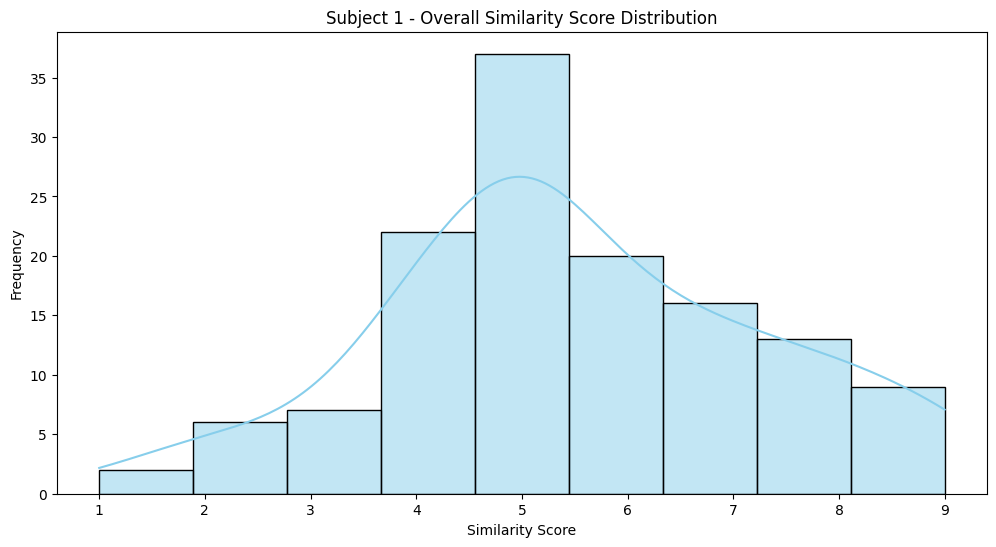


Subject 2:


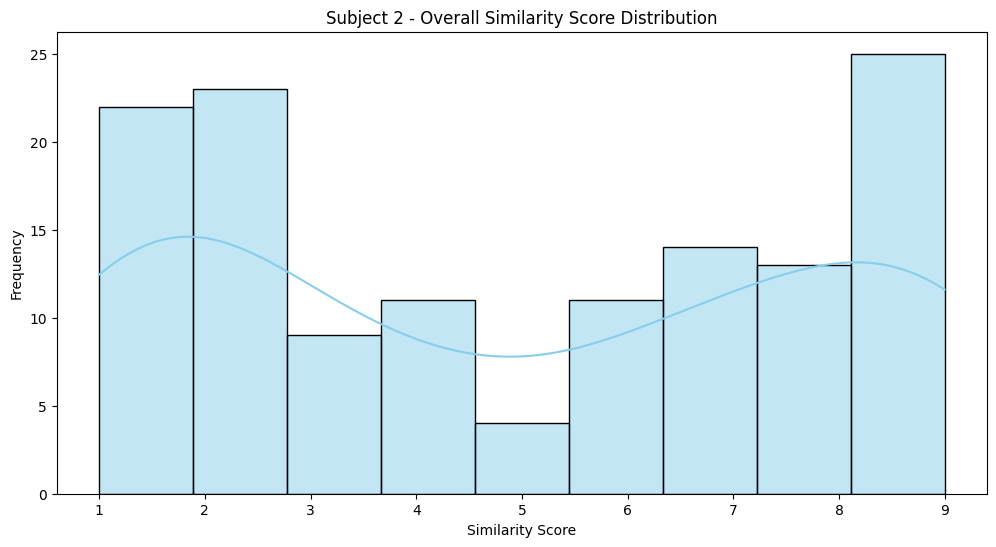


Subject 3:


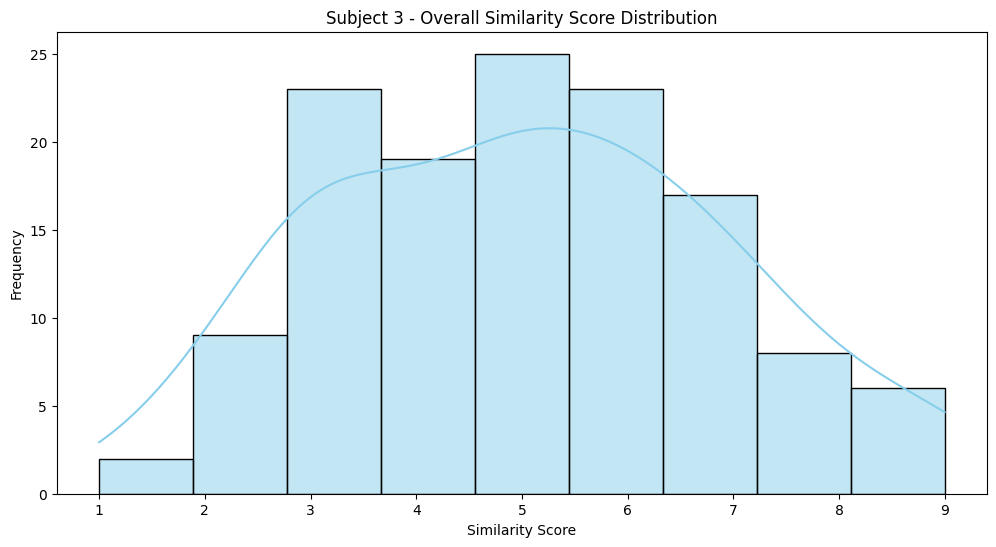


Subject 4:


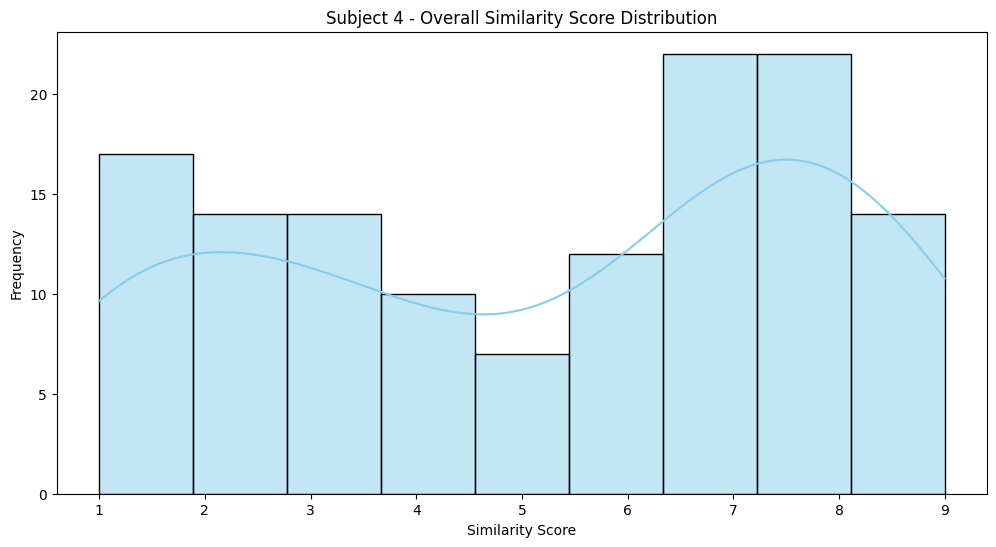


Subject 5:


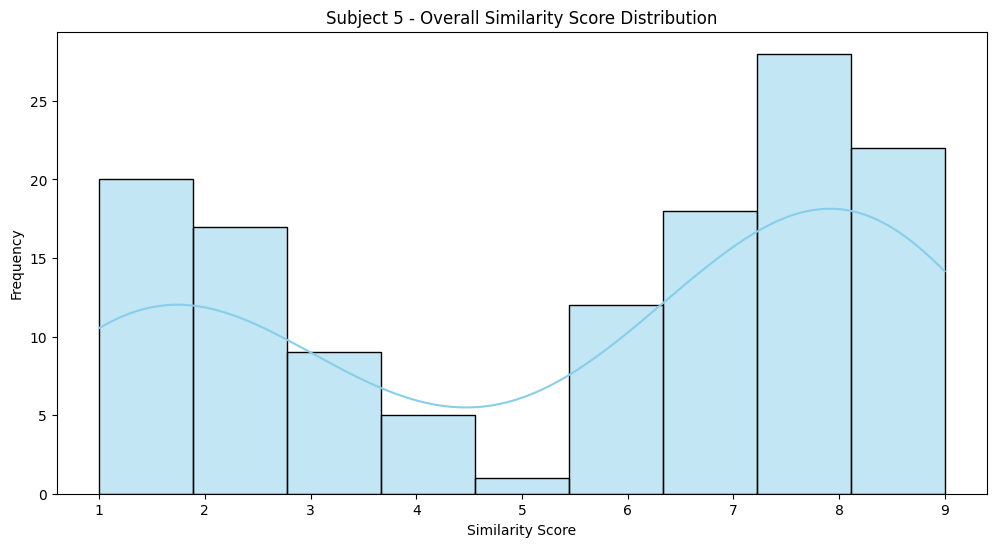

In [95]:
# Iterate over subjects
for subject, file_path in enumerate(file_paths, start=1):
    print(f"\nSubject {subject}:")
    # Load data
    df = load_data(file_paths[subject-1])

    # Extracting individual materials and similarity scores
    df[['Material1', 'Material2']] = df['MaterialPairs'].str.extract(r'\(([^,]+),\s*([^)]+)\)')
    df['SimilarityScores'] = df['SimilarityScores'].astype(int)

    # Plot overall distribution
    plot_overall_distribution(df, subject)


Subject 1:


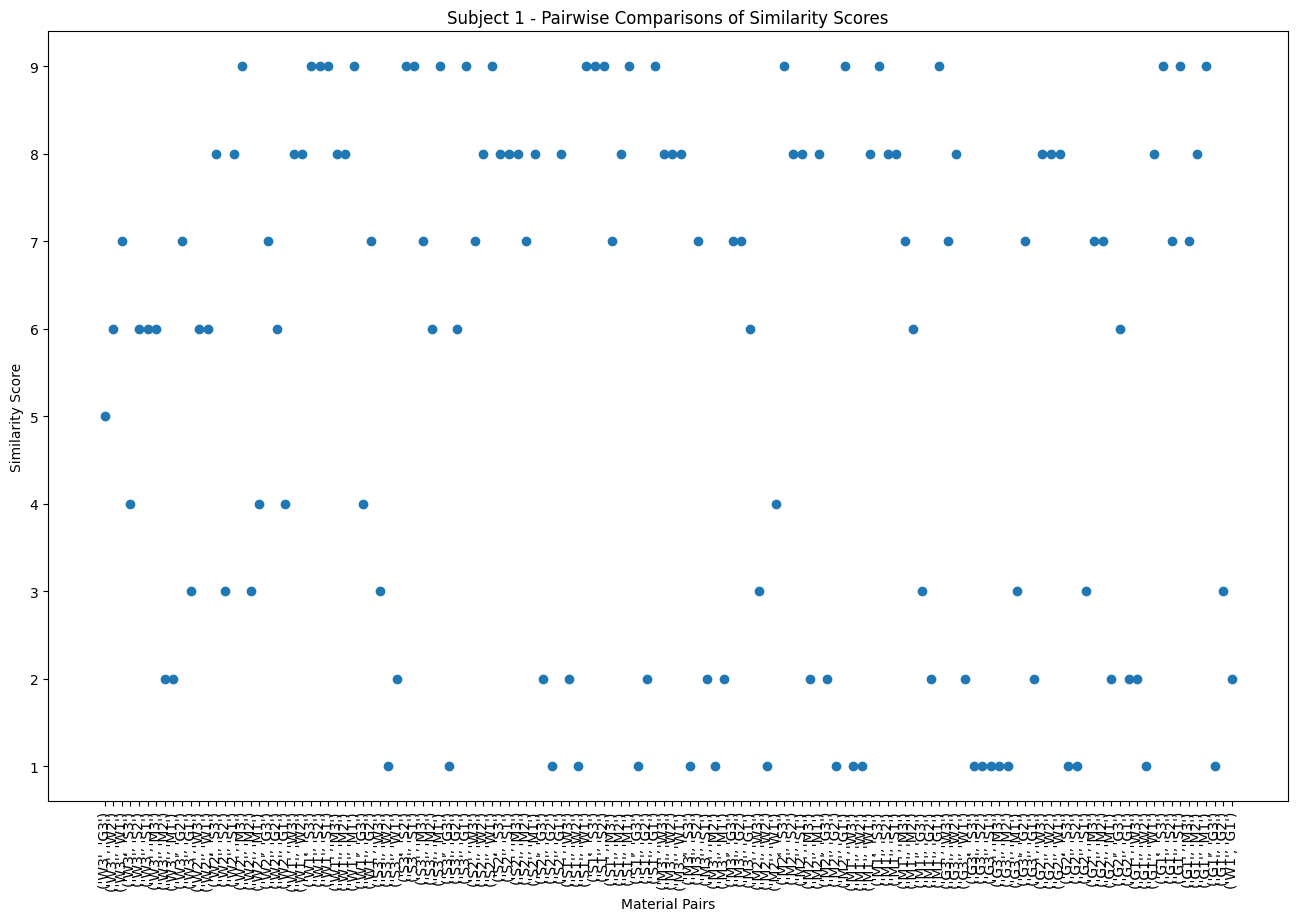


Subject 2:


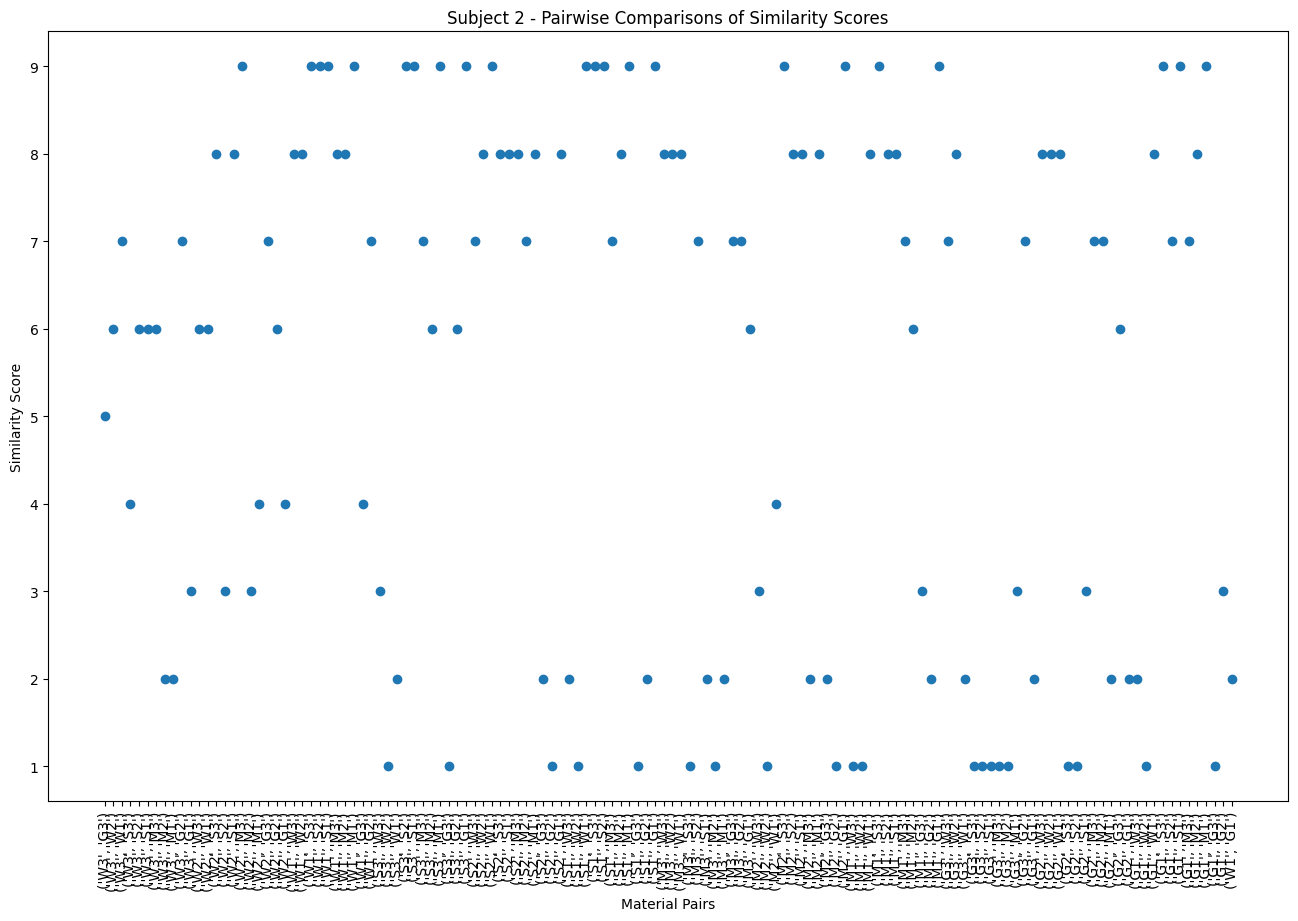


Subject 3:


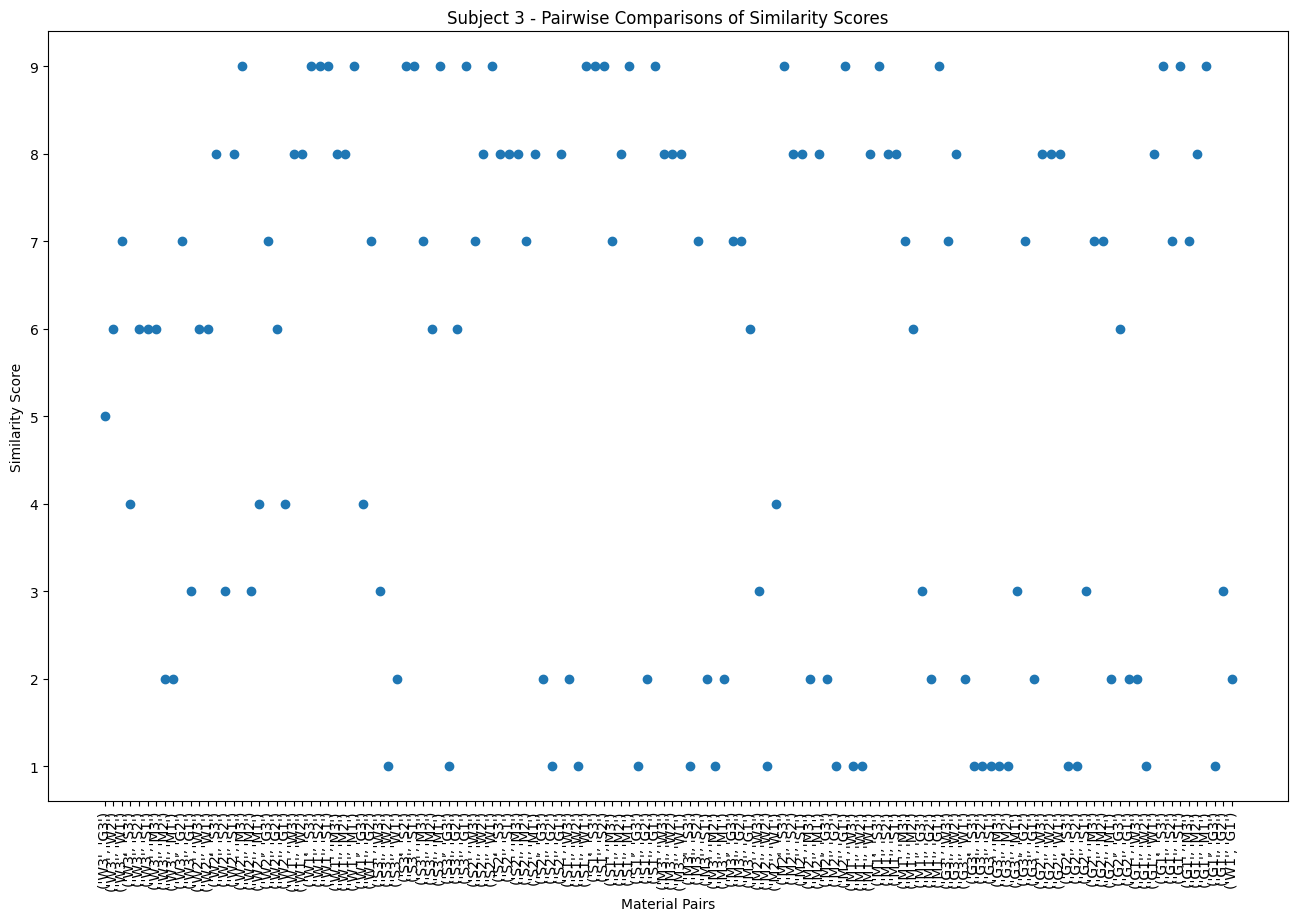


Subject 4:


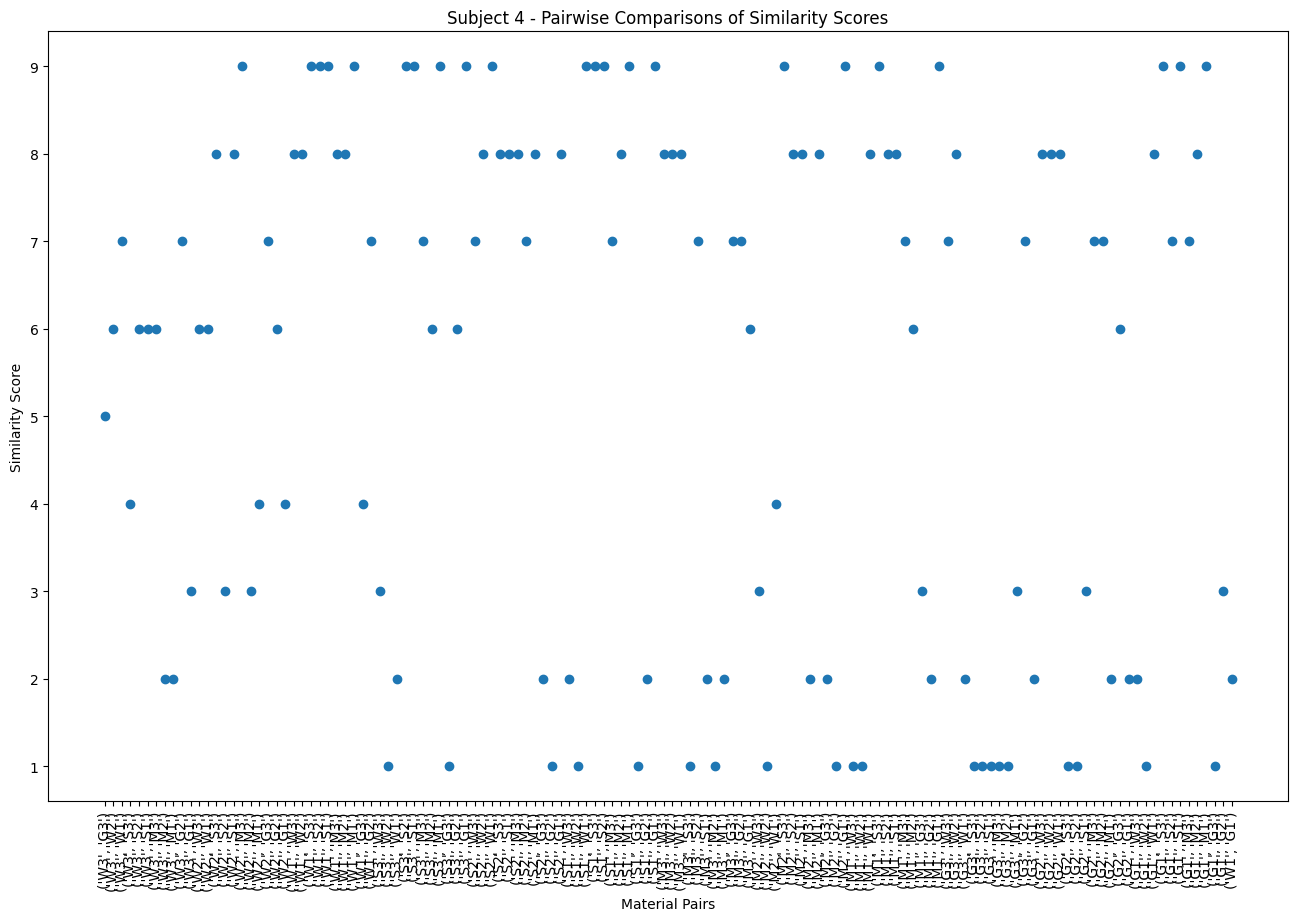


Subject 5:


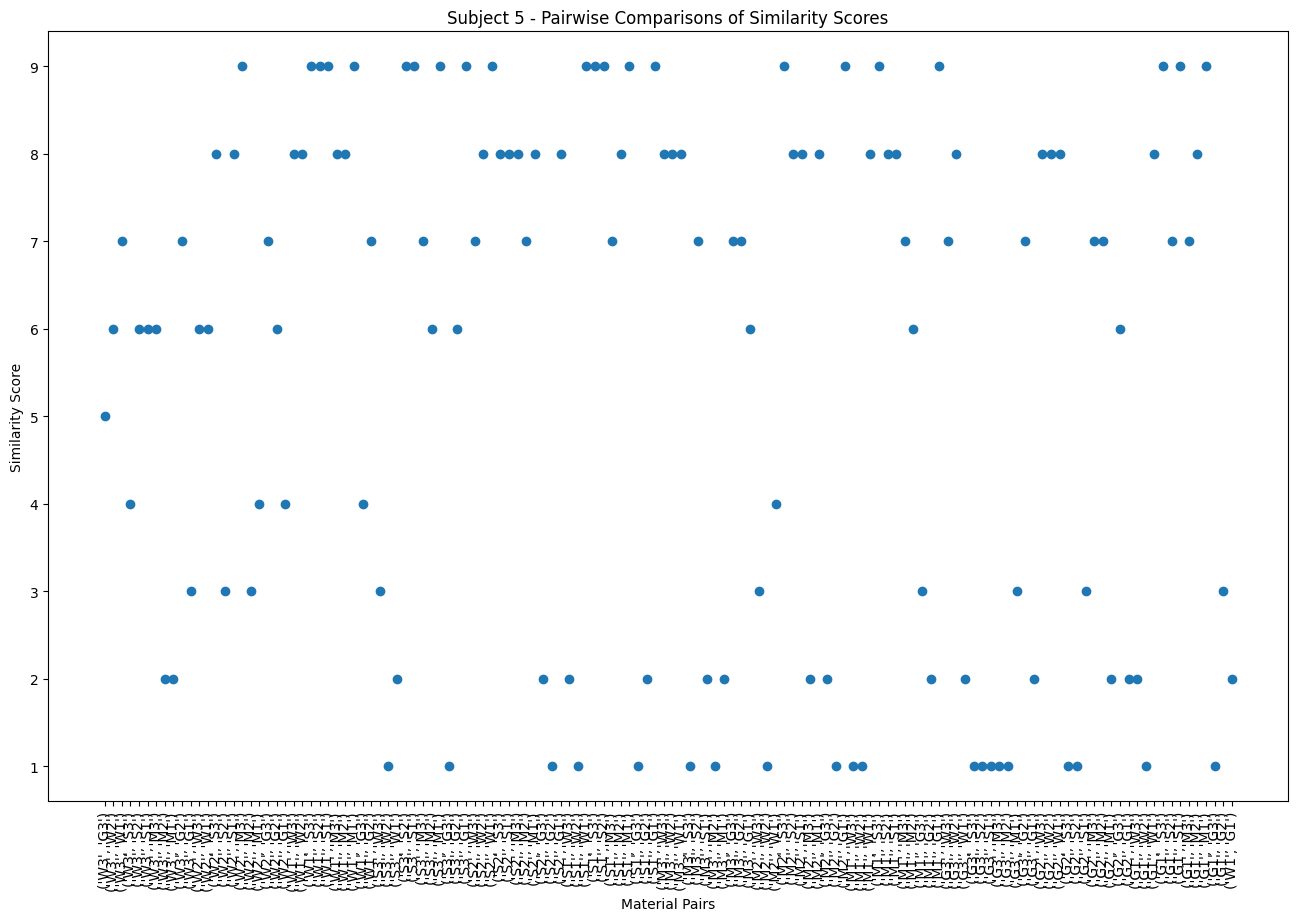

In [96]:
for subject, file_path in enumerate(file_paths, start=1):
    print(f"\nSubject {subject}:")
    pairwise_comparisons(df, subject)



Subject 1:
Subject 1 - Mean Similarity Score - Same Class: 5.833333333333333
Subject 1 - Mean Similarity Score - Different Classes: 5.425925925925926

Material Class: W
Mean Similarity Score - Same Class: 6.833333333333333
Mean Similarity Score - Different Classes: 5.444444444444445
T-statistic: 1.171574215153707, p-value: 0.2461584434211033
There is no significant difference in means.


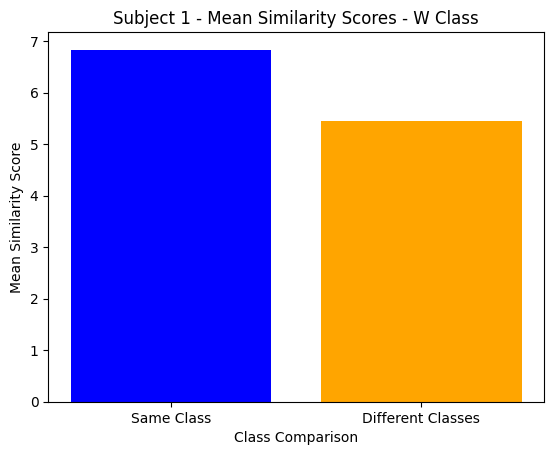


Material Class: S
Mean Similarity Score - Same Class: 8.666666666666666
Mean Similarity Score - Different Classes: 5.648148148148148
T-statistic: 2.282726652449552, p-value: 0.026130210305060388
The means are significantly different.


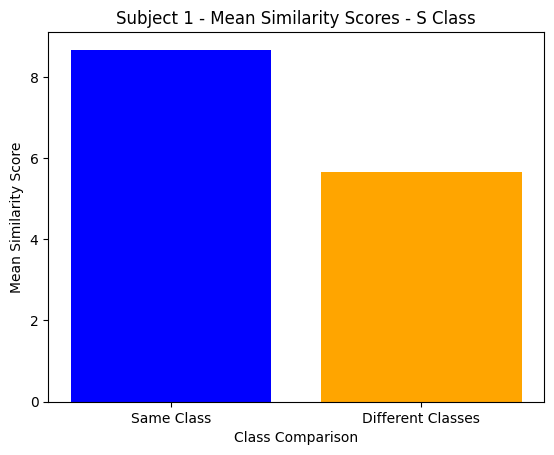


Material Class: M
Mean Similarity Score - Same Class: 4.333333333333333
Mean Similarity Score - Different Classes: 5.796296296296297
T-statistic: -1.153158621446239, p-value: 0.2535755452758443
There is no significant difference in means.


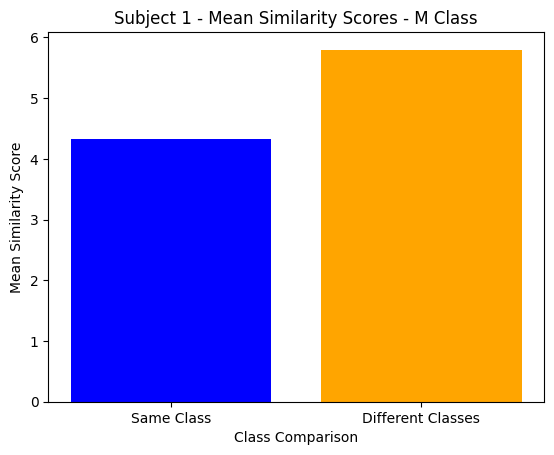


Material Class: G
Mean Similarity Score - Same Class: 3.5
Mean Similarity Score - Different Classes: 4.814814814814815
T-statistic: -1.012985564370834, p-value: 0.3152743636687032
There is no significant difference in means.


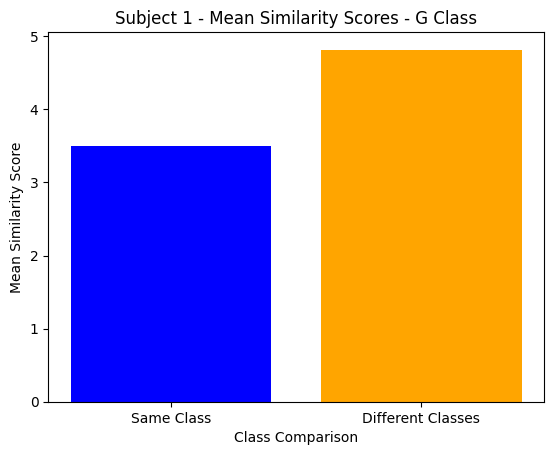


Subject 2:
Subject 2 - Mean Similarity Score - Same Class: 5.833333333333333
Subject 2 - Mean Similarity Score - Different Classes: 5.425925925925926

Material Class: W
Mean Similarity Score - Same Class: 6.833333333333333
Mean Similarity Score - Different Classes: 5.444444444444445
T-statistic: 1.171574215153707, p-value: 0.2461584434211033
There is no significant difference in means.


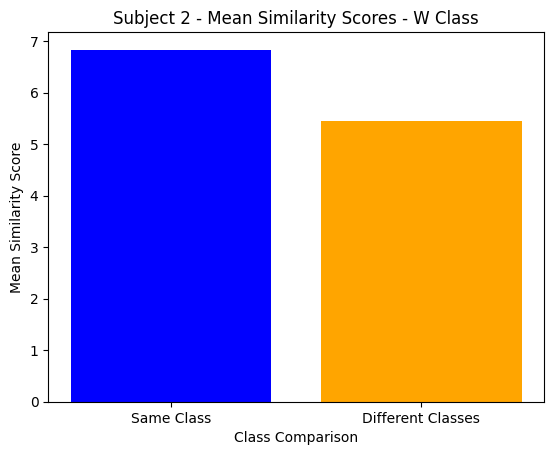


Material Class: S
Mean Similarity Score - Same Class: 8.666666666666666
Mean Similarity Score - Different Classes: 5.648148148148148
T-statistic: 2.282726652449552, p-value: 0.026130210305060388
The means are significantly different.


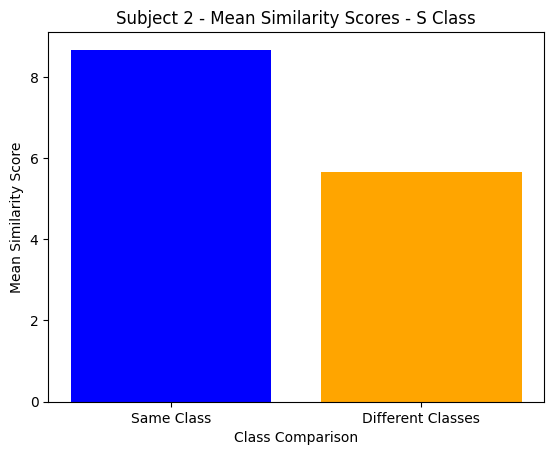


Material Class: M
Mean Similarity Score - Same Class: 4.333333333333333
Mean Similarity Score - Different Classes: 5.796296296296297
T-statistic: -1.153158621446239, p-value: 0.2535755452758443
There is no significant difference in means.


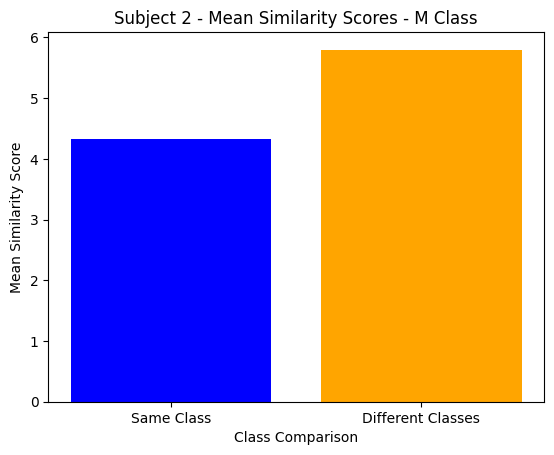


Material Class: G
Mean Similarity Score - Same Class: 3.5
Mean Similarity Score - Different Classes: 4.814814814814815
T-statistic: -1.012985564370834, p-value: 0.3152743636687032
There is no significant difference in means.


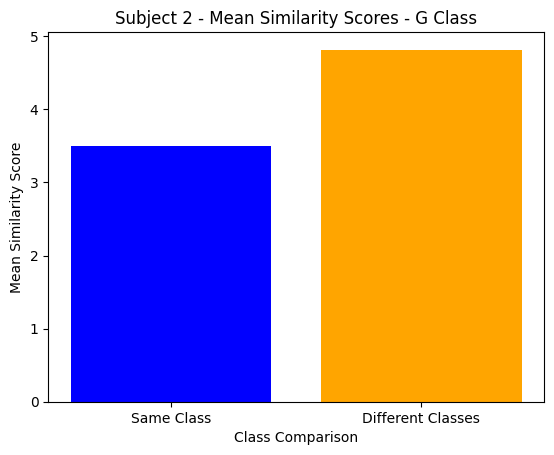


Subject 3:
Subject 3 - Mean Similarity Score - Same Class: 5.833333333333333
Subject 3 - Mean Similarity Score - Different Classes: 5.425925925925926

Material Class: W
Mean Similarity Score - Same Class: 6.833333333333333
Mean Similarity Score - Different Classes: 5.444444444444445
T-statistic: 1.171574215153707, p-value: 0.2461584434211033
There is no significant difference in means.


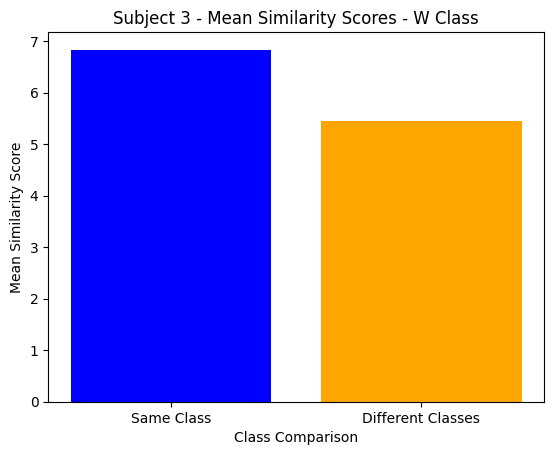


Material Class: S
Mean Similarity Score - Same Class: 8.666666666666666
Mean Similarity Score - Different Classes: 5.648148148148148
T-statistic: 2.282726652449552, p-value: 0.026130210305060388
The means are significantly different.


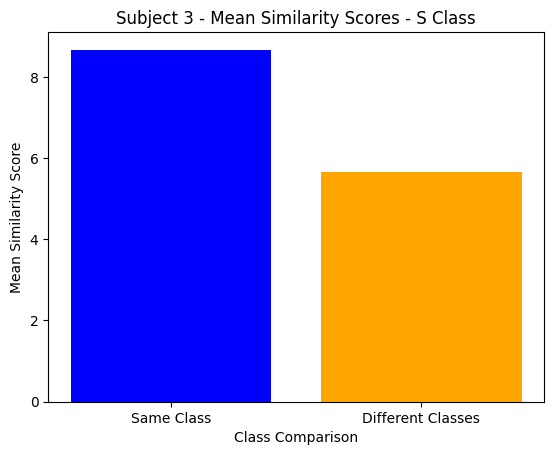


Material Class: M
Mean Similarity Score - Same Class: 4.333333333333333
Mean Similarity Score - Different Classes: 5.796296296296297
T-statistic: -1.153158621446239, p-value: 0.2535755452758443
There is no significant difference in means.


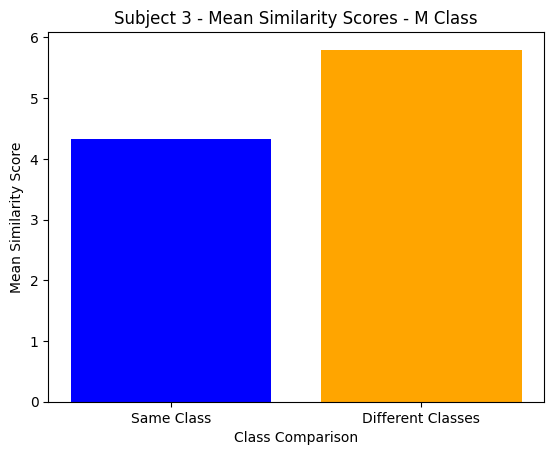


Material Class: G
Mean Similarity Score - Same Class: 3.5
Mean Similarity Score - Different Classes: 4.814814814814815
T-statistic: -1.012985564370834, p-value: 0.3152743636687032
There is no significant difference in means.


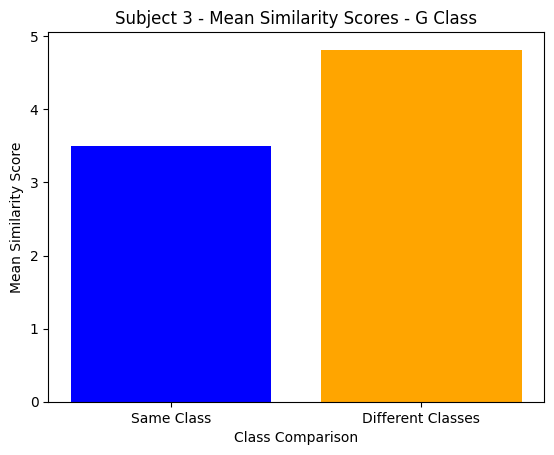


Subject 4:
Subject 4 - Mean Similarity Score - Same Class: 5.833333333333333
Subject 4 - Mean Similarity Score - Different Classes: 5.425925925925926

Material Class: W
Mean Similarity Score - Same Class: 6.833333333333333
Mean Similarity Score - Different Classes: 5.444444444444445
T-statistic: 1.171574215153707, p-value: 0.2461584434211033
There is no significant difference in means.


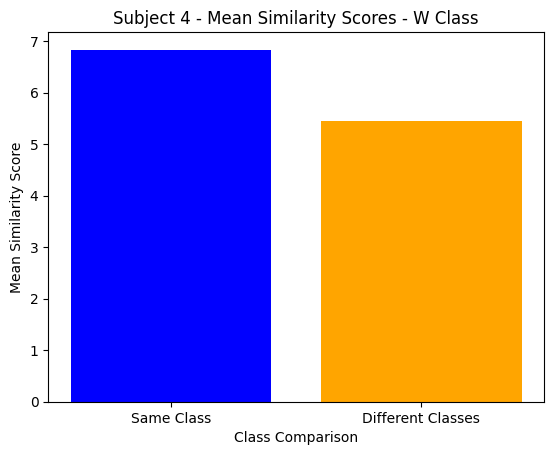


Material Class: S
Mean Similarity Score - Same Class: 8.666666666666666
Mean Similarity Score - Different Classes: 5.648148148148148
T-statistic: 2.282726652449552, p-value: 0.026130210305060388
The means are significantly different.


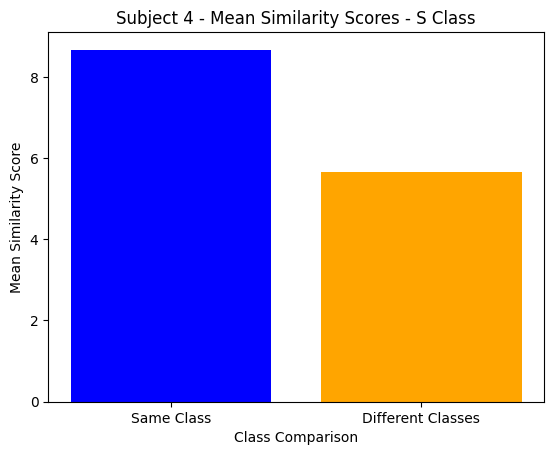


Material Class: M
Mean Similarity Score - Same Class: 4.333333333333333
Mean Similarity Score - Different Classes: 5.796296296296297
T-statistic: -1.153158621446239, p-value: 0.2535755452758443
There is no significant difference in means.


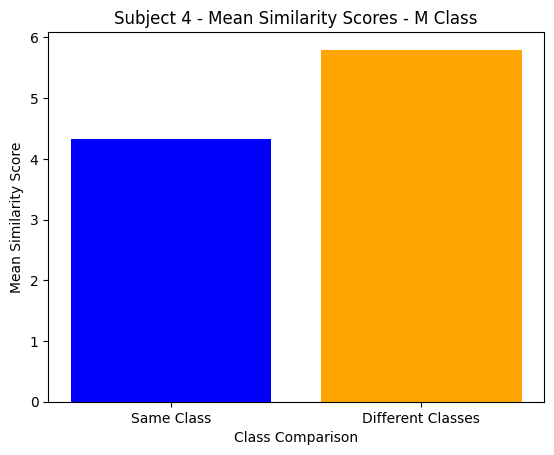


Material Class: G
Mean Similarity Score - Same Class: 3.5
Mean Similarity Score - Different Classes: 4.814814814814815
T-statistic: -1.012985564370834, p-value: 0.3152743636687032
There is no significant difference in means.


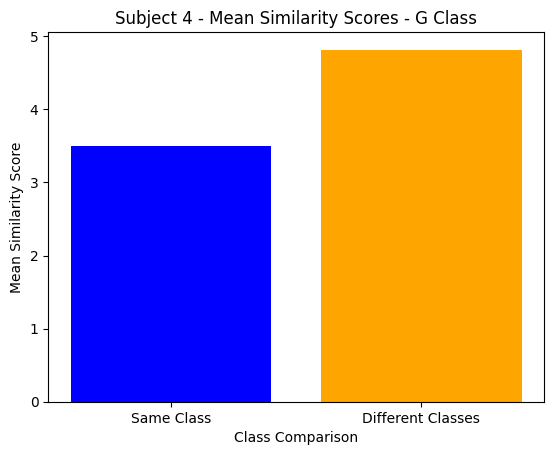


Subject 5:
Subject 5 - Mean Similarity Score - Same Class: 5.833333333333333
Subject 5 - Mean Similarity Score - Different Classes: 5.425925925925926

Material Class: W
Mean Similarity Score - Same Class: 6.833333333333333
Mean Similarity Score - Different Classes: 5.444444444444445
T-statistic: 1.171574215153707, p-value: 0.2461584434211033
There is no significant difference in means.


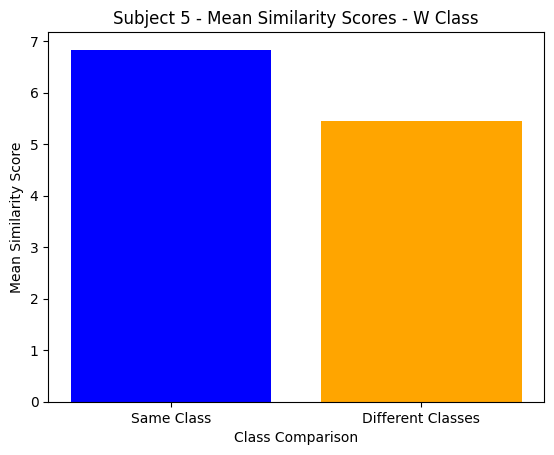


Material Class: S
Mean Similarity Score - Same Class: 8.666666666666666
Mean Similarity Score - Different Classes: 5.648148148148148
T-statistic: 2.282726652449552, p-value: 0.026130210305060388
The means are significantly different.


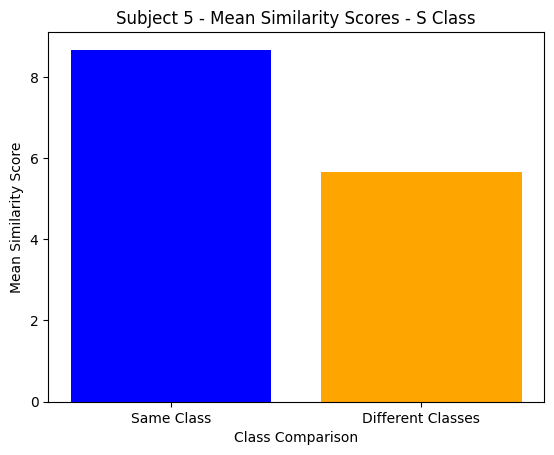


Material Class: M
Mean Similarity Score - Same Class: 4.333333333333333
Mean Similarity Score - Different Classes: 5.796296296296297
T-statistic: -1.153158621446239, p-value: 0.2535755452758443
There is no significant difference in means.


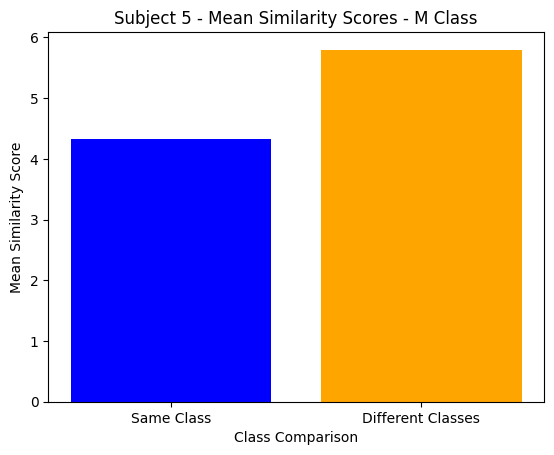


Material Class: G
Mean Similarity Score - Same Class: 3.5
Mean Similarity Score - Different Classes: 4.814814814814815
T-statistic: -1.012985564370834, p-value: 0.3152743636687032
There is no significant difference in means.


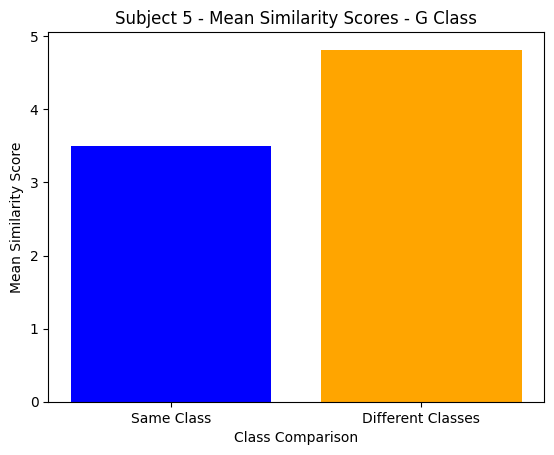

In [97]:
for subject, file_path in enumerate(file_paths, start=1):
    print(f"\nSubject {subject}:")
    pairwise_class_comparison(df, subject)



Subject 1:


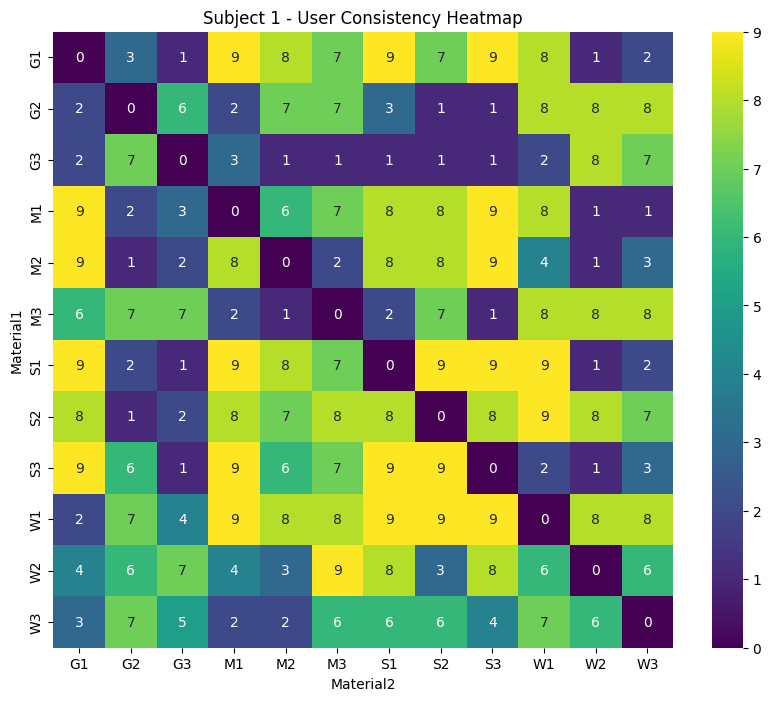


Subject 2:


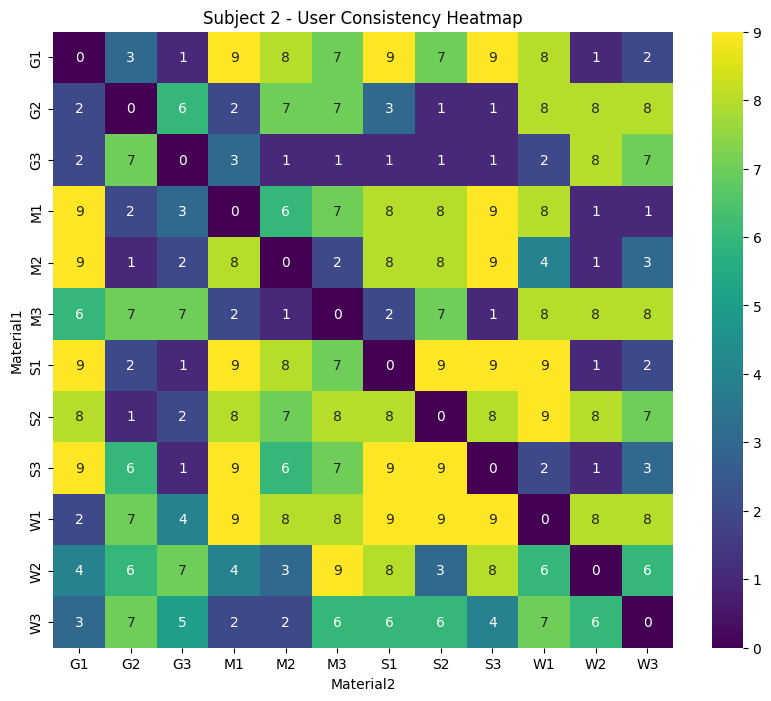


Subject 3:


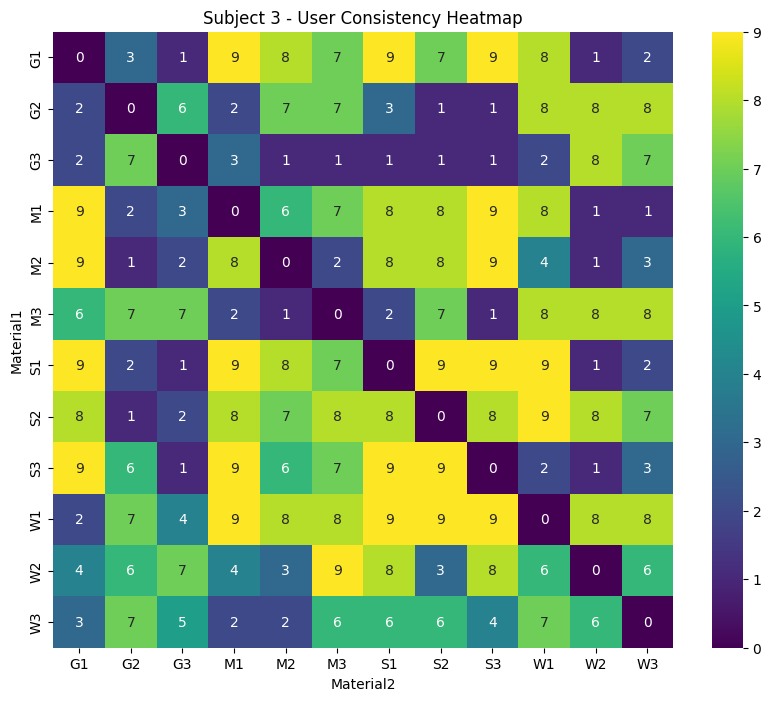


Subject 4:


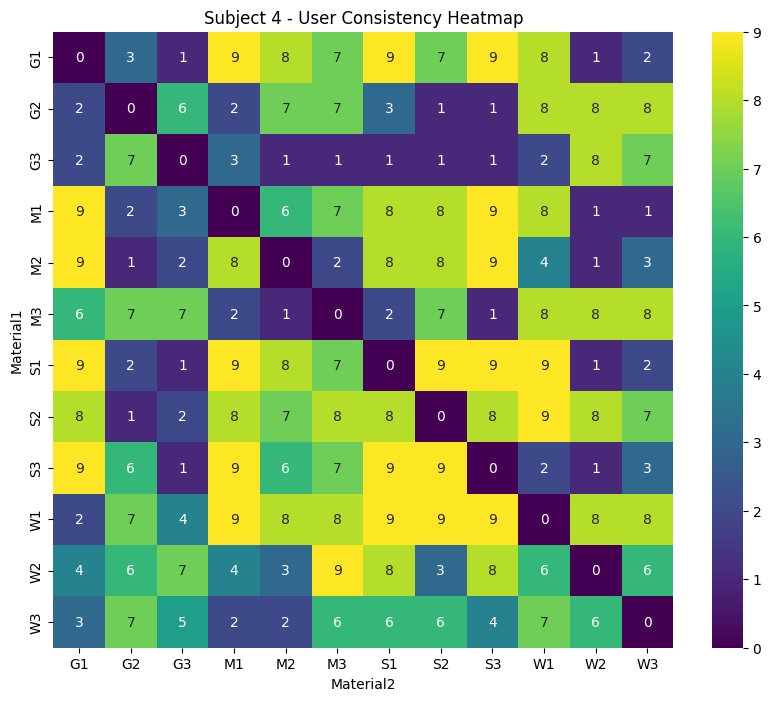


Subject 5:


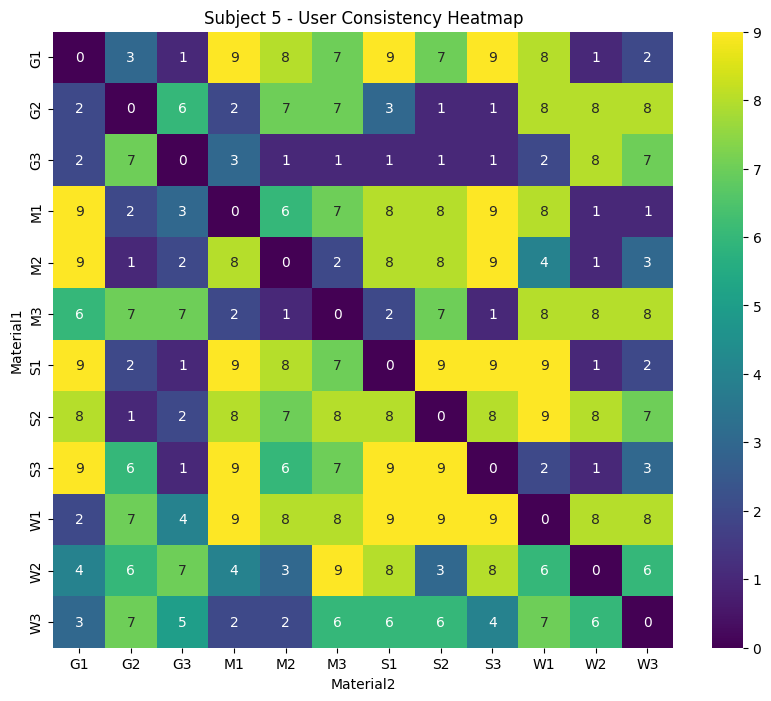

In [98]:
for subject, file_path in enumerate(file_paths, start=1):
    print(f"\nSubject {subject}:")
    user_consistency_analysis(df, subject)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


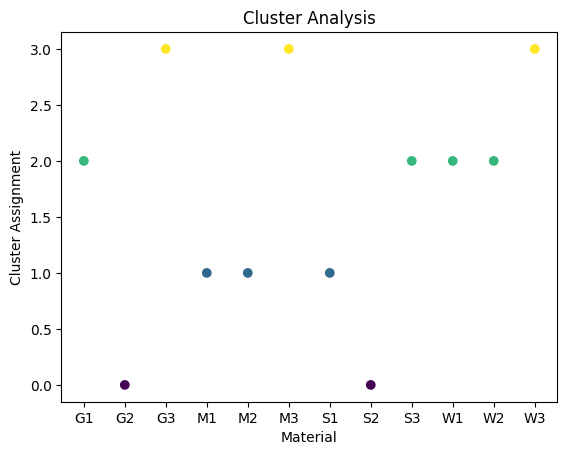

In [99]:
# Cluster Analysis using KMeans
data_for_clustering = df.pivot_table(index='Material1', columns='Material2', values='SimilarityScores', fill_value=0)
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(data_for_clustering)

# Visualize cluster assignments
plt.scatter(data_for_clustering.index, clusters, c=clusters, cmap='viridis')
plt.title('Cluster Analysis')
plt.xlabel('Material')
plt.ylabel('Cluster Assignment')
plt.show()